#Exploratory data analysis notebook

## Import necessary python libraries


In [0]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
vidstarted= pd.read_csv('drive/My Drive/Capstone/CleverTap Capstone/Data/VideoStarted.csv')

mod_vidstarted=vidstarted.copy()
mod_vidstarted['OS'] = vidstarted['OS'].replace({0:'Others',1:'Android',2:'iOS',3:'Windows',4:'Mac',
                                                        5:'Blackberry',6:'Linux'})
mod_vidstarted['Device'] = vidstarted['Device'].replace({0:'Desktop',1:'Mobile',2:'Tablet',3:'TV'})

In [0]:
#add titles in the graphs if unavailable

## NEED TO DO -- FREQ DIST VID DETAILS, WATCHED

Text(0.5, 1.0, 'MOST WATCHED GENRES')

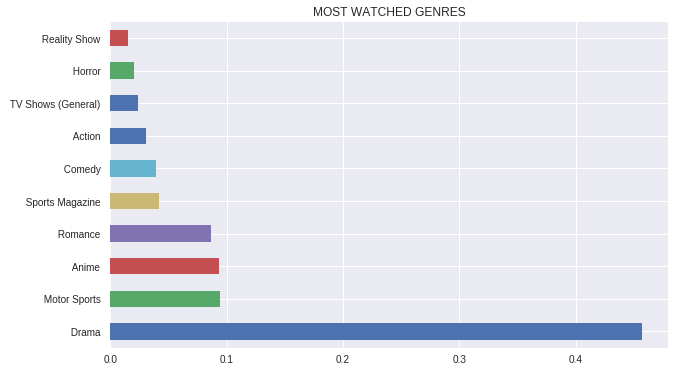

In [3]:
plt.figure(figsize=(10,6))
mod_vidstarted.Genre.value_counts(normalize=True)[:10].plot(kind='barh')
sns.despine(bottom=True, left=True)
plt.title('MOST WATCHED GENRES')

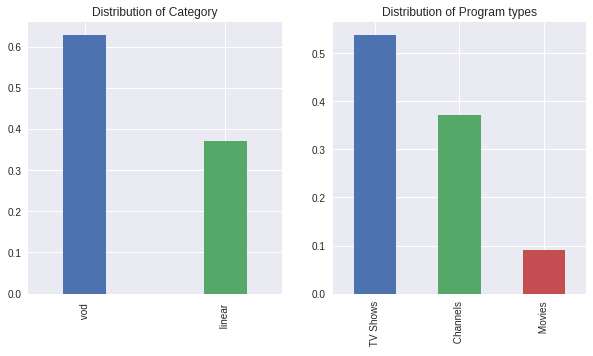

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(121)
ax = mod_vidstarted.Category.value_counts(normalize=True).plot(kind='bar',width=0.3)
ax.set_title('Distribution of Category')
plt.subplot(122)
ax1 = mod_vidstarted.ProgramType.value_counts(normalize=True).plot(kind='bar')
ax1.set_title('Distribution of Program types')
sns.despine(bottom=True, left=True)

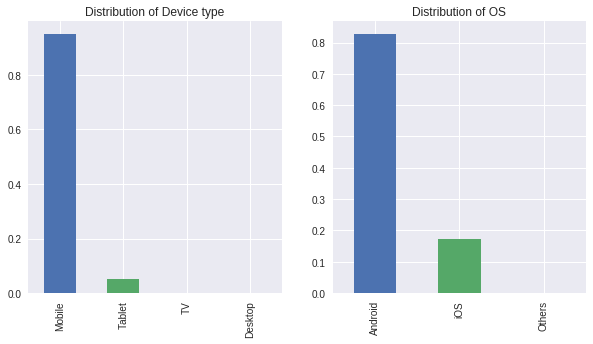

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(121)
ax = mod_vidstarted.Device.value_counts(normalize=True).plot(kind='bar')
ax.set_title('Distribution of Device type')
plt.subplot(122)
ax1 = mod_vidstarted.OS.value_counts(normalize=True).plot(kind='bar')
ax1.set_title('Distribution of OS')
sns.despine(bottom=True, left=True)

Text(0.5, 1.0, 'Distribution of program types viewed in top countries')

<Figure size 720x360 with 0 Axes>

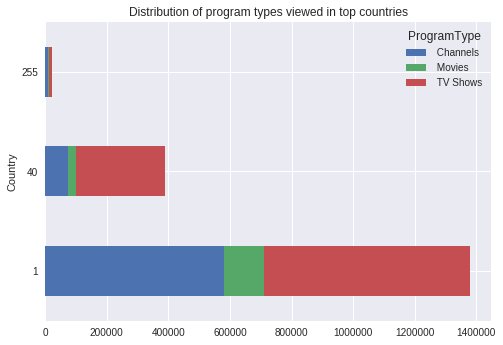

In [9]:
temp = mod_vidstarted.loc[mod_vidstarted.Country.isin([1,40,255])]
plt.figure(figsize=(10,5))
temp.groupby(['Country','ProgramType'])['UserId'].size().unstack().plot(kind='barh',stacked=True)
plt.title('Distribution of program types viewed in top countries')


Text(0.5, 1.0, 'Number of users in top countries')

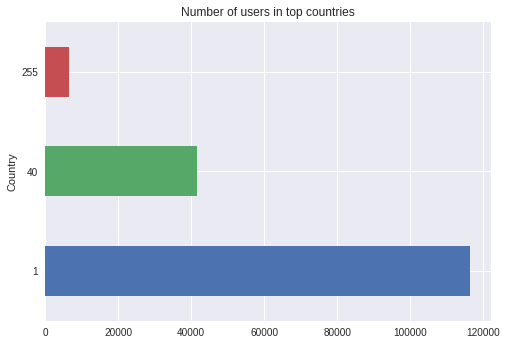

In [10]:
temp.groupby(['Country'])['UserId'].nunique().plot(kind='barh')
plt.title('Number of users in top countries')

# ANALYSIS POST MODELLING


In [0]:
final_df = pd.read_csv('drive/My Drive/Capstone/CleverTap Capstone/Data/final_df.csv',index_col=0)
cols = [col.strip() for col in final_df.columns.tolist()]
final_df.columns = cols

In [0]:
from sklearn.feature_selection import SelectKBest,chi2
sk = SelectKBest(score_func=chi2,k=7)
sk.fit(final_df.iloc[:,:-1],final_df.iloc[:,-1])
#print(sk.get_support())
from itertools import compress
print(list(compress(final_df.columns.tolist(),sk.get_support())))

['Channels', 'Motor Sports', 'linear', 'installed_times', 'launched_days', 'vid_rep_count', 'watched_days']


Text(0.5, 1.0, 'Churned vs Retained users')

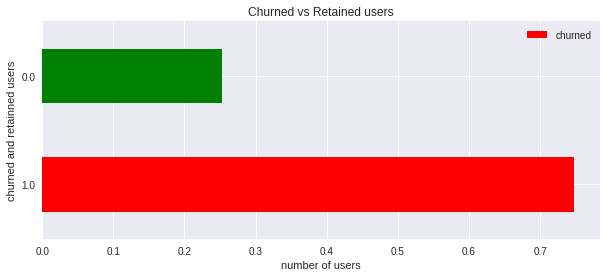

In [12]:
plt.figure(figsize=(10,4))
ax = final_df.actual.value_counts(normalize=True).plot(kind='barh',color=['r','g'])
ax.set_xlabel('number of users')
ax.set_ylabel('churned and retainned users')
ax.legend(["churned","retained"])
ax.set_title('Churned vs Retained users')

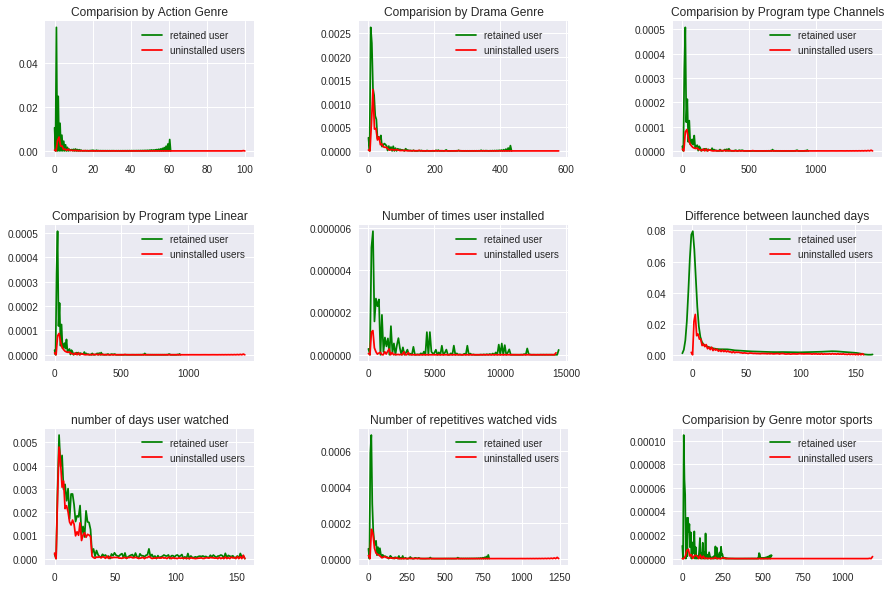

In [4]:
fig,axes = plt.subplots(3,3,figsize=(15,10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

sns.kdeplot(final_df[final_df.actual==0]['Action'],label='retained user',color='g',ax=axes[0][0])
sns.kdeplot(final_df[final_df.actual==1]['Action'],label='uninstalled users',color='r',ax=axes[0][0]).set_title('Comparision by Action Genre')

sns.kdeplot(final_df[final_df.actual==0]['Drama'],label='retained user',color='g',ax=axes[0][1])
sns.kdeplot(final_df[final_df.actual==1]['Drama'],label='uninstalled users',color='r',ax=axes[0][1]).set_title('Comparision by Drama Genre')

sns.kdeplot(final_df[final_df.actual==0]['Channels'],label='retained user',color='g',ax=axes[0][2])
sns.kdeplot(final_df[final_df.actual==1]['Channels'],label='uninstalled users',color='r',ax=axes[0][2]).set_title('Comparision by Program type Channels')

sns.kdeplot(final_df[final_df.actual==0]['linear'],label='retained user',color='g',ax=axes[1][0])
sns.kdeplot(final_df[final_df.actual==1]['linear'],label='uninstalled users',color='r',ax=axes[1][0]).set_title('Comparision by Program type Linear')

sns.kdeplot(final_df[final_df.actual==0]['installed_times'],label='retained user',color='g',ax=axes[1][1])
sns.kdeplot(final_df[final_df.actual==1]['installed_times'],label='uninstalled users',color='r',ax=axes[1][1]).set_title('Number of times user installed')

sns.kdeplot(final_df[final_df.actual==0]['launched_days'],label='retained user',color='g',ax=axes[1][2])
sns.kdeplot(final_df[final_df.actual==1]['launched_days'],label='uninstalled users',color='r',ax=axes[1][2]).set_title('Difference between launched days')

sns.kdeplot(final_df[final_df.actual==0]['watched_days'],label='retained user',color='g',ax=axes[2][0])
sns.kdeplot(final_df[final_df.actual==1]['watched_days'],label='uninstalled users',color='r',ax=axes[2][0]).set_title('number of days user watched')

sns.kdeplot(final_df[final_df.actual==0]['vid_rep_count'],label='retained user',color='g',ax=axes[2][1])
sns.kdeplot(final_df[final_df.actual==1]['vid_rep_count'],label='uninstalled users',color='r',ax=axes[2][1]).set_title('Number of repetitives watched vids')

sns.kdeplot(final_df[final_df.actual==0]['Motor Sports'],label='retained user',color='g',ax=axes[2][2])
sns.kdeplot(final_df[final_df.actual==1]['Motor Sports'],label='uninstalled users',color='r',ax=axes[2][2]).set_title('Comparision by Genre motor sports')

plt.show()

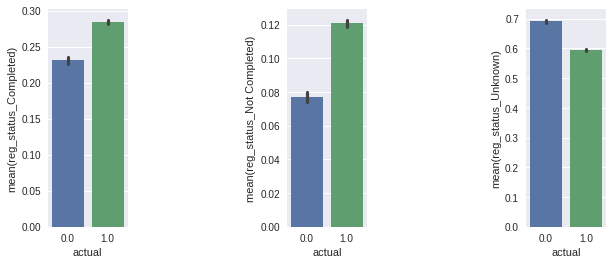

In [14]:
plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=2)
plt.subplot(131)
sns.barplot(x='actual',y='reg_status_Completed',data=final_df)
plt.subplot(132)
sns.barplot(x='actual',y='reg_status_Not Completed',data=final_df)
plt.subplot(133)
sns.barplot(x='actual',y='reg_status_Unknown',data=final_df)

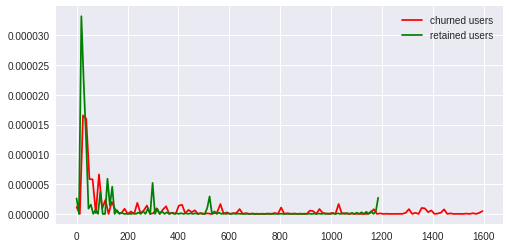

In [0]:
plt.figure(figsize=(8,4))

sns.kdeplot(final_df[final_df.actual==0]['utm_visited_times'],color='r',label='churned users')
sns.kdeplot(final_df[final_df.actual==1]['utm_visited_times'],color='g',label='retained users')



Text(0.5, 1.0, 'frequency distribution of user clicking video details')

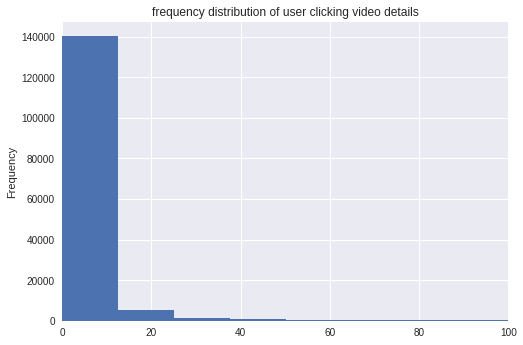

In [23]:
final_df.viddet_view_cnt.plot(kind='hist',bins=100)
plt.xlim(0,100)
plt.title('frequency distribution of user clicking video details')